#  Social Media Data Analysis

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset from csv file

df = pd.read_csv("../DATA/social_media.csv")
df.head()

,username,age,gender,location,followers,posts,friends
0,user1,28,male,Philadelphia,5493,56,605
1,user2,22,female,Los Angeles,9530,25,683
2,user3,22,male,Philadelphia,7200,20,100
3,user4,32,female,New York,7164,90,364
4,user5,33,male,San Diego,4034,44,624


In [3]:
# Details of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   username   10 non-null     object
 1   age        10 non-null     int64 
 2   gender     10 non-null     object
 3   location   10 non-null     object
 4   followers  10 non-null     int64 
 5   posts      10 non-null     int64 
 6   friends    10 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 692.0+ bytes


In [4]:
# Count of values Location column
df['location'].value_counts()

location
Philadelphia    2
Los Angeles     2
Phoenix         2
New York        1
San Diego       1
Dallas          1
Chicago         1
Name: count, dtype: int64

In [5]:
# Location with most active users on total posts

df_grouped_location = df.groupby(by="location")['posts'].sum()

# Index of location with most active users
location_most_active = df_grouped_location.idxmax()
print(f"The location with most active users based on posts is {location_most_active}")
print(f"The total number of posts is {df_grouped_location.max()}")


The location with most active users based on posts is New York
The total number of posts is 90


In [6]:
 # Gender with least number of friends
df_grouped_gender = df.groupby(by='gender')['friends'].sum()

gender_least_friends = df_grouped_gender.idxmin()

print(f"The gender with least number of friends is {gender_least_friends}")
print(f"The total number of friends is {df_grouped_gender.min()}")


The gender with least number of friends is male
The total number of friends is 3017


In [7]:
# Most active user based on posts

# Age of the most active user
active_user_age = df.sort_values(by="posts", ascending=False).loc[:,'age'].head(1)

# Age of the most active user
active_user_gender = df.sort_values(by="posts", ascending=False).loc[:,'gender'].head(1)

# Age of the most active user
active_user_location = df.sort_values(by="posts", ascending=False).loc[:,'location'].head(1)

print(f"The age of the most active user is {active_user_age.iloc[0]}")
print(f"The gender of the most active user is {active_user_gender.iloc[0]}")
print(f"The location of the most active user is {active_user_location.iloc[0]}")

The age of the most active user is 32
The gender of the most active user is female
The location of the most active user is New York


In [8]:
# City with most female users

df_grouped_city = df.groupby(by=['location','gender']).size().reset_index(name="count")

# Female users
female_users = df_grouped_city[df_grouped_city['gender']=='female']

# City with most female users
city_most_female = female_users["count"].idxmax()

city = female_users.iloc[city_most_female]["location"]
print(f"The city with most female users is {city}")

The city with most female users is Los Angeles


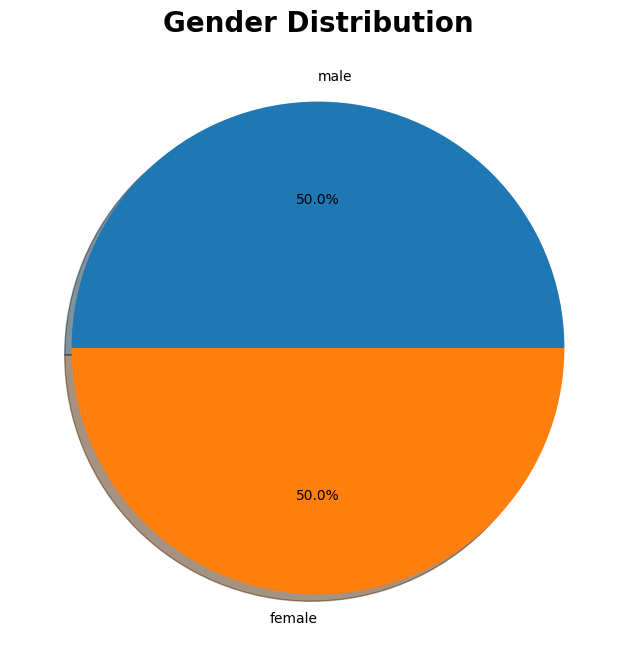

In [9]:
# Number of male and female users
count_gender = df['gender'].value_counts()

# Pie chart showing gender
fig,ax = plt.subplots(figsize=(12,8))
ax.pie(x=count_gender, labels=count_gender.index,
       autopct='%1.1f%%',
       shadow=True)
plt.title(label="Gender Distribution",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()